In [1030]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl


In [1031]:
train_df = pd.read_csv('data/credit_train.csv')
test_df = pd.read_csv('data/credit_test.csv')

In [1032]:
train_df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0


In [1033]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  int64  
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null 

In [1034]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       10000 non-null  object 
 1   Customer ID                   10000 non-null  object 
 2   Current Loan Amount           10000 non-null  int64  
 3   Term                          10000 non-null  object 
 4   Credit Score                  8019 non-null   float64
 5   Annual Income                 8019 non-null   float64
 6   Years in current job          9573 non-null   object 
 7   Home Ownership                10000 non-null  object 
 8   Purpose                       10000 non-null  object 
 9   Monthly Debt                  10000 non-null  float64
 10  Years of Credit History       10000 non-null  float64
 11  Months since last delinquent  4694 non-null   float64
 12  Number of Open Accounts       10000 non-null  int64  
 13  Nu

In [1035]:
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412,709.0,1167493.0,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,262328,NaN,NaN,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,99999999,741.0,2231892.0,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,347666,721.0,806949.0,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,176220,NaN,NaN,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


Описание полей
- Loan ID: уникальный идентификатор кредита;
- Customer ID: уникальный идентификатор клиента;
- Loan Status: категориальный признак - кредит погашен ("Fully Paid") или не погашен ("Charged Off");
- Current Loan Amount: размер кредита;
- Term: срок кредита;
- Credit Score: кредитный рейтинг - число от 0 до 800;
- Years in current job: стаж на текущем месте работы;
- Home Ownership: статус недвижимости - собственность ("Own"), ипотека ("Home Mortgage") или аренда ("Rent");
- Annual Income: годовой доход;
- Purpose: цель кредита;
- Monthly Debt: размер ежемесячного платежа по текущим кредитам;
- Years of Credit History: количество лет кредитной истории;
- Months since last delinquent: количество месяцев с последнего нарушения условий кредита;
- Number of Open Accounts: количество открытых кредитных карт;
- Number of Credit Problems: количество кредитных проблем;
- Current Credit Balance: суммарный текущий долг;
- Maximum Open Credit: максимальный кредитный лимит из всех источников;
- Bankruptcies: количество банкротств;
- Tax Liens: количество нарушений налогового законодательства.

In [1036]:
df_numeric = train_df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = train_df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Current Loan Amount' 'Credit Score' 'Annual Income' 'Monthly Debt'
 'Years of Credit History' 'Months since last delinquent'
 'Number of Open Accounts' 'Number of Credit Problems'
 'Current Credit Balance' 'Maximum Open Credit' 'Bankruptcies' 'Tax Liens']
['Loan ID' 'Customer ID' 'Loan Status' 'Term' 'Years in current job'
 'Home Ownership' 'Purpose']


In [1037]:
def miss_val_percent(df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print('{} - {}%'.format(col, round(pct_missing*100)))

In [1038]:
miss_val_percent(train_df)

Loan ID - 0%
Customer ID - 0%
Loan Status - 0%
Current Loan Amount - 0%
Term - 0%
Credit Score - 19%
Annual Income - 19%
Years in current job - 4%
Home Ownership - 0%
Purpose - 0%
Monthly Debt - 0%
Years of Credit History - 0%
Months since last delinquent - 53%
Number of Open Accounts - 0%
Number of Credit Problems - 0%
Current Credit Balance - 0%
Maximum Open Credit - 0%
Bankruptcies - 0%
Tax Liens - 0%


In [1039]:
miss_val_percent(test_df)

Loan ID - 0%
Customer ID - 0%
Current Loan Amount - 0%
Term - 0%
Credit Score - 20%
Annual Income - 20%
Years in current job - 4%
Home Ownership - 0%
Purpose - 0%
Monthly Debt - 0%
Years of Credit History - 0%
Months since last delinquent - 53%
Number of Open Accounts - 0%
Number of Credit Problems - 0%
Current Credit Balance - 0%
Maximum Open Credit - 0%
Bankruptcies - 0%
Tax Liens - 0%


## Categorical data processing

<Axes: xlabel='Loan Status', ylabel='Count'>

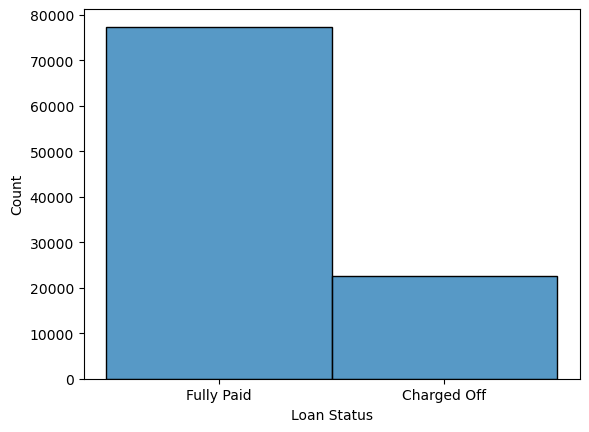

In [1040]:
sns.histplot(df_non_numeric['Loan Status'])

<Axes: xlabel='Term', ylabel='Count'>

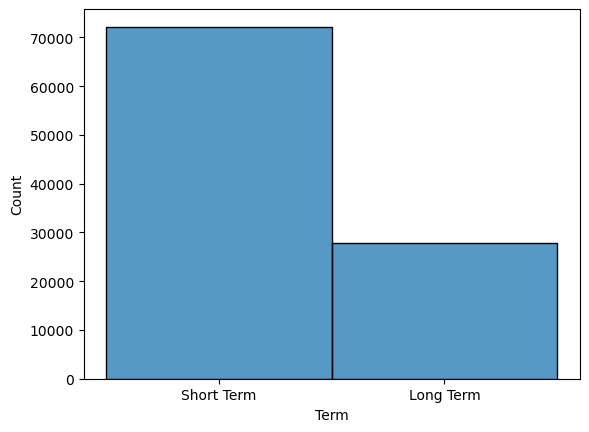

In [1041]:
sns.histplot(df_non_numeric['Term'])

<Axes: xlabel='Home Ownership', ylabel='Count'>

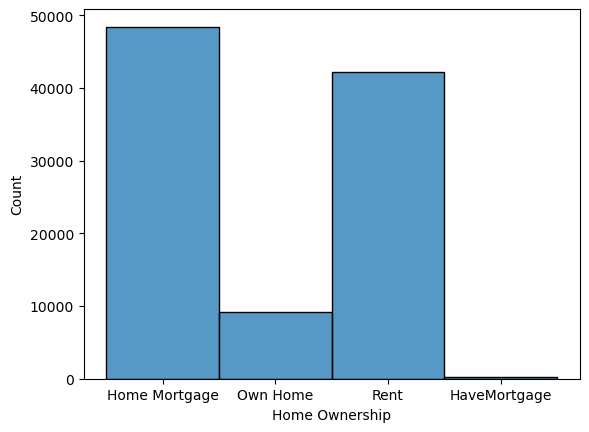

In [1042]:
sns.histplot(df_non_numeric['Home Ownership'])

In [1043]:
df_non_numeric['Purpose'].value_counts()

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [1044]:
df_non_numeric['Years in current job'].value_counts()


10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

## Categorical data summary
Нужно сделать:
- Импутировать пропски в "Years in current job"
- Сменить havemortgage на Home Mortgage in "Home Ownership"
- В Purpose объеденить Other and other
- В Purpose разделить причины кредита на: инвестиция, потребление, покрытие долгов, other.


## Numeric data processing

In [1045]:
# Функция, которая считает процент повтаречния значения в данных
def is_inform(df):
    num_rows = len(df.index)
    low_information_cols = [] #

    for col in df.columns:
        cnts = df[col].value_counts(dropna=False)
        top_pct = (cnts/num_rows).iloc[0]
        
        if top_pct > 0.9:
            low_information_cols.append(col)
            print('{0}: {1:.5f}%'.format(col, top_pct*100))
            print(cnts)
            print()

In [1046]:
is_inform(train_df)

Tax Liens: 98.06200%
0.0     98062
1.0      1343
2.0       374
3.0       111
4.0        58
5.0        16
6.0        12
NaN        10
7.0         7
9.0         3
11.0        2
15.0        1
10.0        1
Name: Tax Liens, dtype: int64



array([[<Axes: title={'center': 'Current Loan Amount'}>,
        <Axes: title={'center': 'Credit Score'}>,
        <Axes: title={'center': 'Annual Income'}>],
       [<Axes: title={'center': 'Monthly Debt'}>,
        <Axes: title={'center': 'Years of Credit History'}>,
        <Axes: title={'center': 'Months since last delinquent'}>],
       [<Axes: title={'center': 'Number of Open Accounts'}>,
        <Axes: title={'center': 'Number of Credit Problems'}>,
        <Axes: title={'center': 'Current Credit Balance'}>],
       [<Axes: title={'center': 'Maximum Open Credit'}>,
        <Axes: title={'center': 'Bankruptcies'}>,
        <Axes: title={'center': 'Tax Liens'}>]], dtype=object)

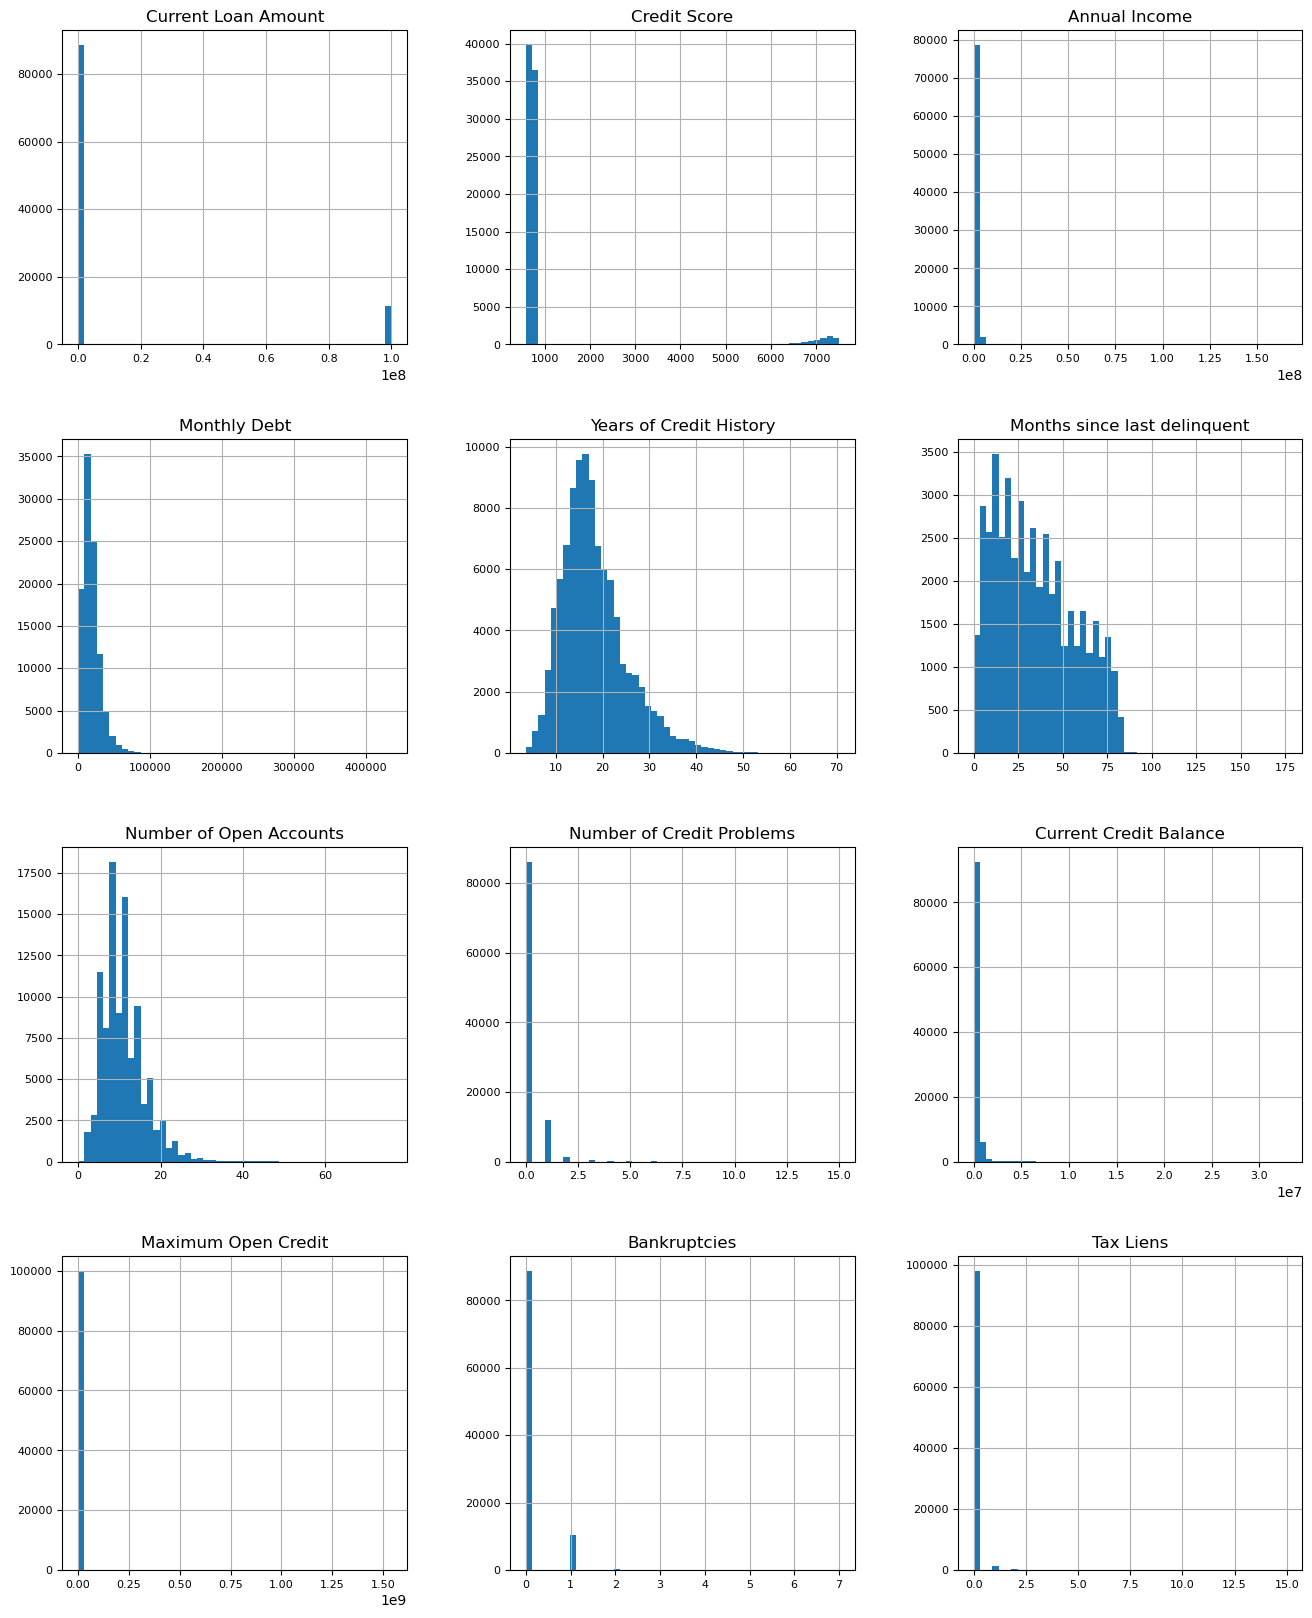

In [1047]:
df_numeric.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [1048]:
df_numeric.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


## Numeric data summary

- Очистить все от выбросов
- Удалить "Tax Liens"
- Импутировать пробелы

In [1049]:
def clean_data(df):
    df = df.drop(columns=['Tax Liens'])
    df = df.drop(columns=['Months since last delinquent'])

    # Будем считать выбросы в Credit Score ошибкой ввода. Поделим все значеня >800 на 10
    df.loc[df['Credit Score'] > 800, 'Credit Score'] = df['Credit Score'] / 10

    # Все что в Monthly Debt больше 97 percentile будем считать выбросами и заменим на NAN
    # Аналогично и для некоторых других столбцов
    df.loc[df['Monthly Debt'] > df['Monthly Debt'].quantile(.97), 'Monthly Debt'] = np.nan
    df.loc[df['Annual Income'] > df['Annual Income'].quantile(.97), 'Annual Income'] = np.nan
    df.loc[df['Current Credit Balance'] > df['Current Credit Balance'].quantile(.97), 'Current Credit Balance'] = np.nan
    df.loc[df['Maximum Open Credit'] > df['Maximum Open Credit'].quantile(.97), 'Maximum Open Credit'] = np.nan
    df.loc[df['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = np.nan

    # Заполнение пропусков
    df['Current Loan Amount'] = df['Current Loan Amount'].fillna(df['Current Loan Amount'].median())
    df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())
    df['Monthly Debt'] = df['Monthly Debt'].fillna(df['Monthly Debt'].median())
    df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())
    df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())
    df['Current Credit Balance'] = df['Current Credit Balance'].fillna(df['Current Credit Balance'].median())
    df['Years in current job'] = df['Years in current job'].fillna('< 1 year')
    df['Bankruptcies'] = df['Bankruptcies'].fillna(0)

    df.loc[df['Home Ownership'] == 'HaveMortgage', 'Home Ownership'] = 'Home Mortgage'
    df.loc[df['Purpose'] == 'other', 'Purpose'] = 'Other'

    # Разделим данные в Purpose на классы Debt Consolidation, Сonsuming, Investment

    df.loc[df['Purpose'] == 'Medical Bills', 'Purpose'] = 'Debt Consolidation'
    df.loc[df['Purpose'] == 'Business Loan', 'Purpose'] = 'Investment'
    df.loc[df['Purpose'] == 'small_business', 'Purpose'] = 'Investment'
    df.loc[df['Purpose'] == 'Educational Expenses', 'Purpose'] = 'Investment'
    df.loc[(df['Purpose'] != 'Investment') & (df['Purpose'] != 'Debt Consolidation') 
           & (df['Purpose'] != 'Other'), 'Purpose'] = 'Сonsuming'

    return df

In [1050]:
train_df = clean_data(train_df)

array([[<Axes: title={'center': 'Current Loan Amount'}>,
        <Axes: title={'center': 'Credit Score'}>,
        <Axes: title={'center': 'Annual Income'}>],
       [<Axes: title={'center': 'Monthly Debt'}>,
        <Axes: title={'center': 'Years of Credit History'}>,
        <Axes: title={'center': 'Number of Open Accounts'}>],
       [<Axes: title={'center': 'Number of Credit Problems'}>,
        <Axes: title={'center': 'Current Credit Balance'}>,
        <Axes: title={'center': 'Maximum Open Credit'}>],
       [<Axes: title={'center': 'Bankruptcies'}>, <Axes: >, <Axes: >]],
      dtype=object)

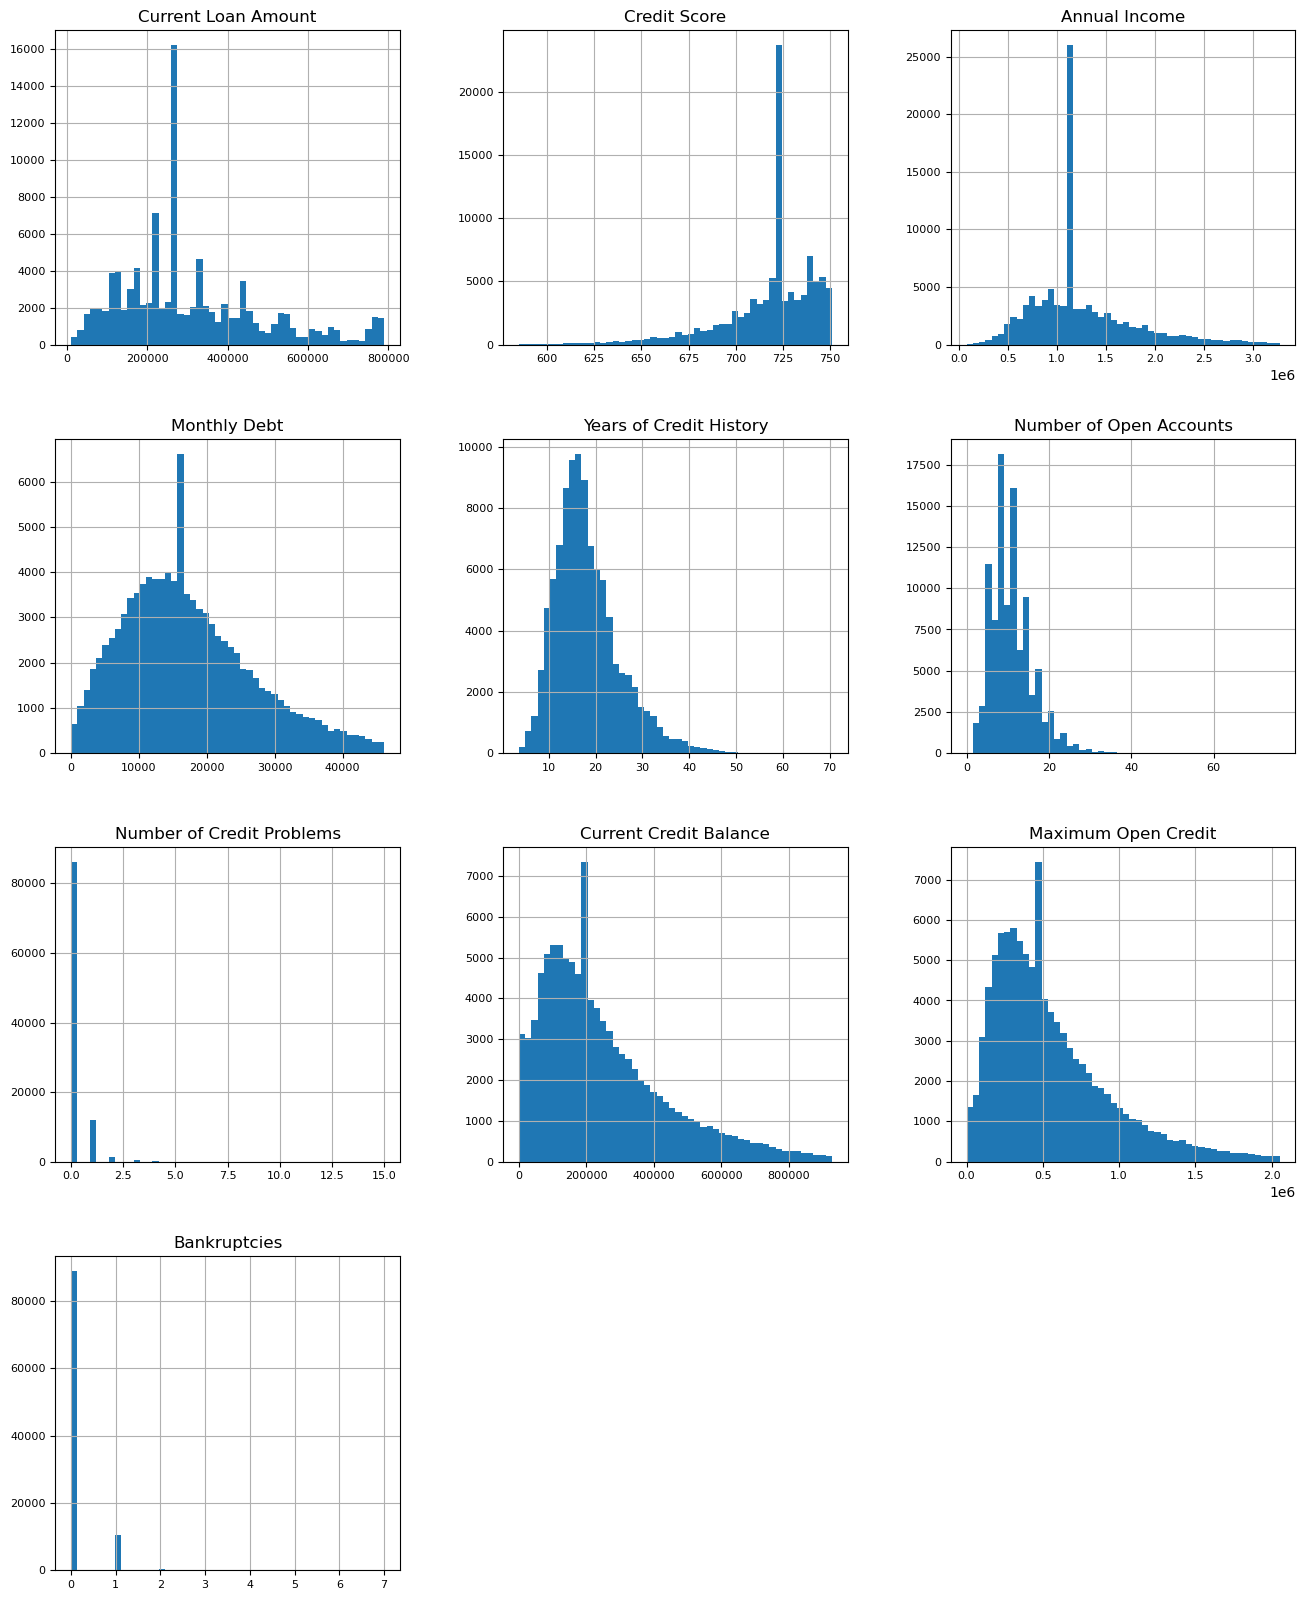

In [1051]:
train_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [1052]:
train_df = train_df.drop(['Customer ID', 'Loan ID'], axis=1, inplace=False)

train_df_pr = train_df

X = train_df_pr.drop(('Loan Status'), axis=1)
y = train_df_pr['Loan Status']

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for col in X.select_dtypes(exclude=[np.number]).columns.values:
    X[col] = le.fit_transform(X[col])

In [1053]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

## Models

In [983]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42).fit(X_train, y_train)
y_pred=clf_lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.77345

In [786]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=50).fit(X_train, y_train)
y_pred=clf_knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.7726

In [787]:
from sklearn import tree
clf_dt = tree.DecisionTreeClassifier(max_depth=7).fit(X_train, y_train)
y_pred=clf_dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.77195

In [788]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier().fit(X_train, y_train)
y_pred=clf_rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7783

In [789]:
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100, 10, 2), activation='logistic', batch_size=32).fit(X_train, y_train)
y_pred = clf_mlp.predict(X_test)
accuracy_score(y_test, y_pred)

0.77345

In [760]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier().fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)
accuracy_score(y_test, y_pred)

0.77235

In [985]:
import catboost as cb
cat = cb.CatBoostClassifier()
cat.fit(X_train, y_train, verbose=False)
y_pred = cat.predict(X_test)
accuracy_score(y_test, y_pred)

0.7769

In [986]:
test_df = clean_data(test_df)

In [988]:
for col in test_df.select_dtypes(exclude=[np.number]).columns.values:
    if (col != 'Loan ID') & (col != 'Loan Status'):
        test_df[col] = le.fit_transform(test_df[col])

In [993]:
X_cat = test_df.drop(['Loan ID', 'Customer ID'], axis=1)

In [995]:
result = cat.predict(X_cat)

In [996]:
output = pd.DataFrame({'Loan ID': test_df['Loan ID'], 'Loan Status': result})
output.to_csv('submission.csv', index=False)